In [ ]:
# Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" 
# and others are "Good"

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# DT lib

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

# label Encoder
from sklearn.preprocessing import LabelEncoder

In [3]:
# divide the data 
from sklearn.model_selection import train_test_split

# checking Accuracy
from sklearn.metrics import accuracy_score

## Preprocessing the Data

In [4]:
fraud = pd.read_csv('Fraud_check.csv')

In [5]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
label_encode = LabelEncoder()
fraud['Undergrad'] = label_encode.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = label_encode.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = label_encode.fit_transform(fraud['Urban'])

In [8]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [ ]:
# no need to normalize data

In [9]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
fraud[fraud.duplicated()].shape

(0, 6)

In [ ]:
# no duplicates # no missing values

In [11]:
len(fraud['Taxable.Income'].unique())

599

In [ ]:
# Taxable.Income  is continous in nature - converting it in categorical

In [12]:
n = []

for i in fraud['Taxable.Income']:
    if i <= 30000:
        n.append('Risky')
    else:
        n.append('Good')

In [13]:
fraud.insert(0,column='Taxable_Category', value = n)

In [14]:
fraud.drop('Taxable.Income',axis=1,inplace=True)

In [15]:
fraud.head()

,Taxable_Category,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,Good,0,2,50047,10,1
1,Good,1,0,134075,18,1
2,Good,0,1,160205,30,1
3,Good,1,2,193264,15,1
4,Good,0,1,27533,28,0


In [16]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Taxable_Category  600 non-null    object
 1   Undergrad         600 non-null    int32 
 2   Marital.Status    600 non-null    int32 
 3   City.Population   600 non-null    int64 
 4   Work.Experience   600 non-null    int64 
 5   Urban             600 non-null    int32 
dtypes: int32(3), int64(2), object(1)
memory usage: 21.2+ KB


<AxesSubplot:>

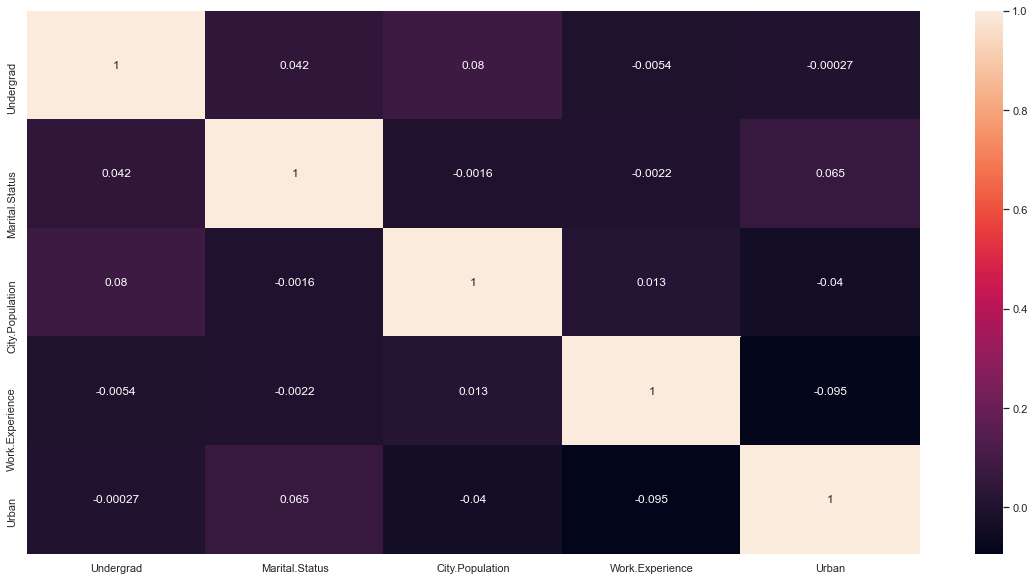

In [17]:
# All other variables are independent

plt.figure(figsize=(20,10))
sns.heatmap(fraud.corr(),annot=True)

In [19]:
x = fraud.iloc[:,1:]
y = fraud.iloc[:,0]

In [20]:
# Splitting the Data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=40)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [21]:
# model form
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=5)

In [22]:
# fitting the data in model

model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

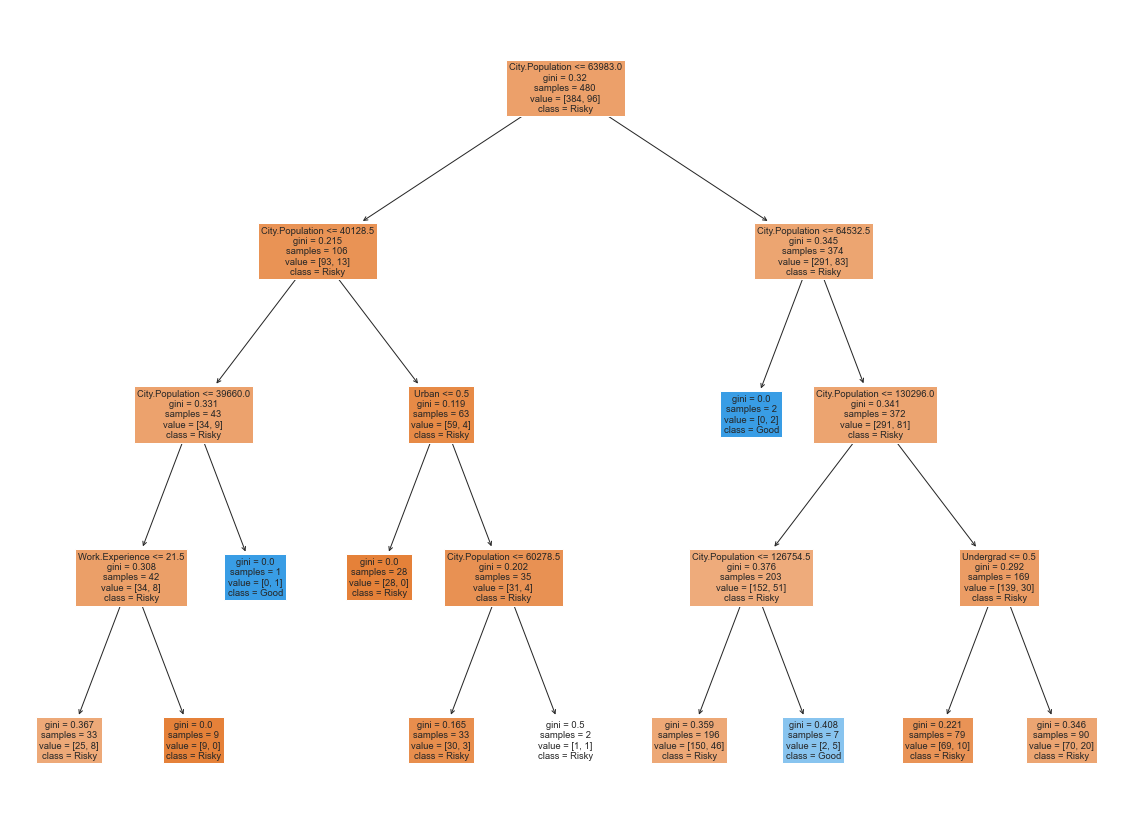

In [23]:
# plotting the tree

fn = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ['Risky','Good']
plt.figure(figsize=(20,15))

tree.plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True);

In [24]:
# for Gini - Accuracy on Training Data

pred_gini_train = model_gini.predict(x_train)

acc_gini_train = accuracy_score(y_train,pred_gini_train)

print(f'The Accuracy by Gini Criteria on Training Data is {np.round(acc_gini_train,4)*100} %')

The Accuracy by Gini Criteria on Training Data is 81.25 %


In [25]:
# for Gini - Accuracy on Testing Data

pred_gini_test = model_gini.predict(x_test)

acc_gini_test = accuracy_score(y_test,pred_gini_test)

print(f'The Accuracy by Gini Criteria on Testing Data is {np.round(acc_gini_test,4)*100} %')

The Accuracy by Gini Criteria on Testing Data is 75.0 %


### Building Decision Tree Classifier (CART) using Entropy Criteria

In [26]:
# model form

model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=5)

In [28]:
# fitting the data in model

model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5)

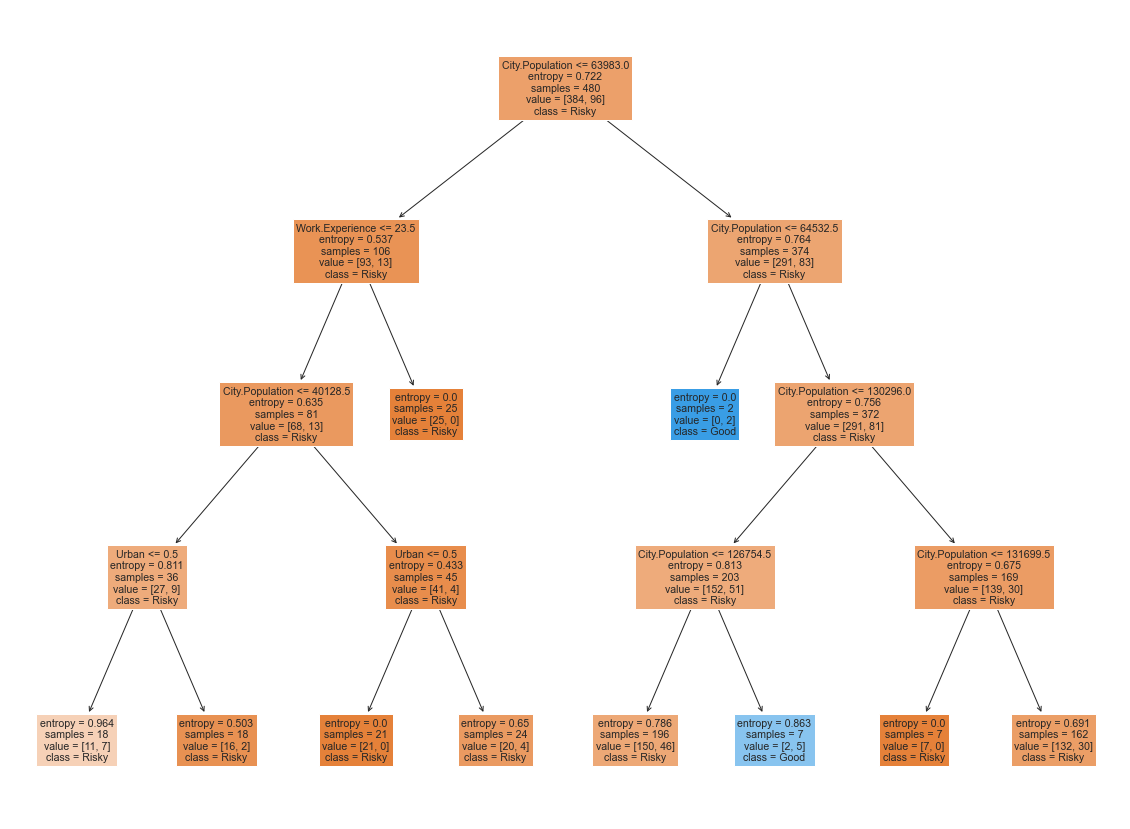

In [29]:
# ploting tree

fn = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ['Risky','Good']
plt.figure(figsize=(20,15))

tree.plot_tree(model_entropy,filled=True,feature_names=fn,class_names=cn);

In [30]:
# for Entropy - Accuracy on Training Data

pred_entropy_train = model_entropy.predict(x_train)

acc_entropy_train = accuracy_score(y_train,pred_entropy_train )

print(f'The Accuracy by Entropy Criteria on Training Data is {np.round(acc_entropy_train,4)*100} %')

The Accuracy by Entropy Criteria on Training Data is 81.04 %


In [31]:
# for Entropy - Accuracy on Training Data

pred_entropy_test = model_entropy.predict(x_test)

acc_entropy_test = accuracy_score(y_test,pred_entropy_test )

print(f'The Accuracy by Entropy Criteria on Training Data is {np.round(acc_entropy_test,4)*100} %')

The Accuracy by Entropy Criteria on Training Data is 75.83 %


### Feature Selection - Segment or Attributes Causes High Sale. 

In [32]:
feature_imp_gini = model_gini.feature_importances_
feature_imp_gini

array([0.0583974 , 0.        , 0.8477052 , 0.06306542, 0.03083198])

In [33]:
feature = model_gini.feature_names_in_
feature

array(['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'], dtype=object)

Text(0.5, 1.0, 'Gini Criteria')

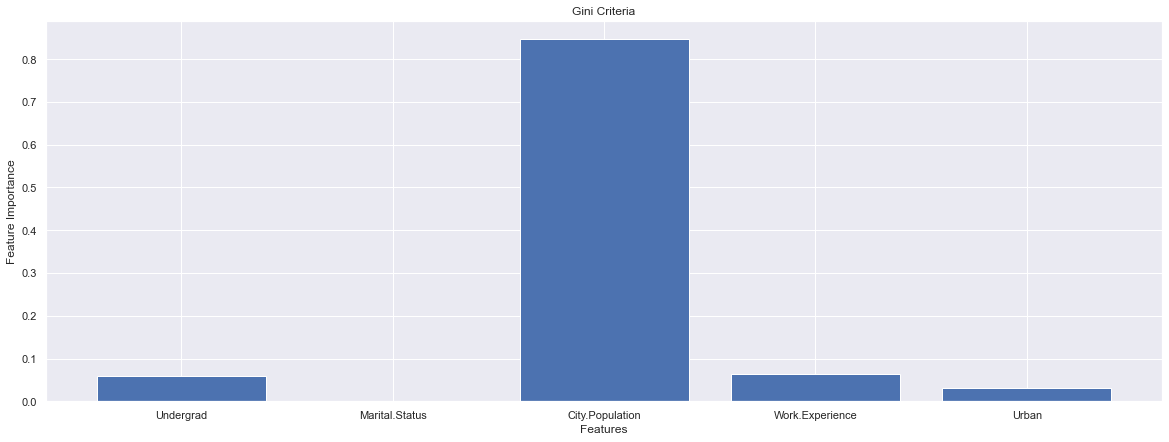

In [34]:
plt.figure(figsize=(20,7))
plt.bar(feature,feature_imp_gini)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Gini Criteria')

In [ ]:
# by Entropy

In [35]:
feature_imp_e = model_entropy.feature_importances_
feature_imp_e

array([0.        , 0.        , 0.62646626, 0.16779265, 0.20574109])

In [36]:
features = model_entropy.feature_names_in_
features

array(['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'], dtype=object)

Text(0.5, 1.0, 'Entropy Criteria')

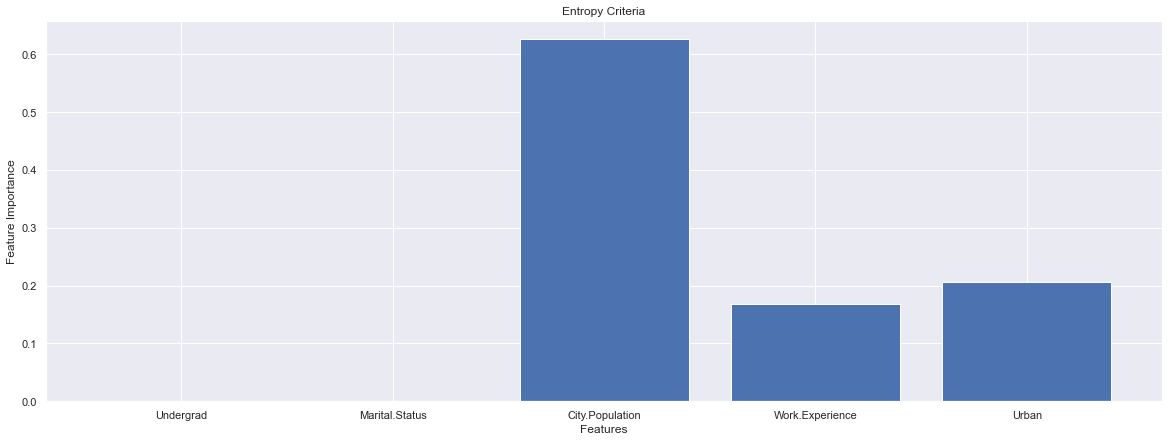

In [37]:
plt.figure(figsize=(20,7))
plt.bar(features,feature_imp_e,)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Entropy Criteria')

In [ ]:
# important atribute is City Population 